In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from impyute.imputation.cs import mice
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedKFold
import xgboost
from sklearn.preprocessing import OneHotEncoder
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
from sklearn.metrics import r2_score


Text(0.5, 1.0, 'Korelacja pomiędzy cechami')

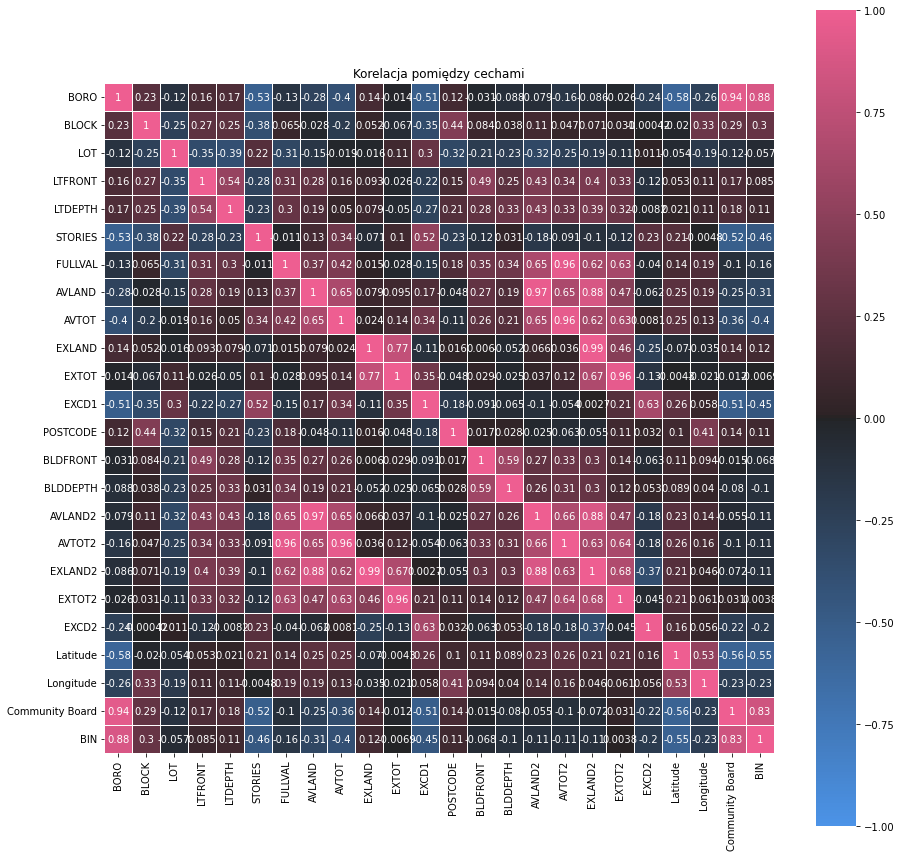

In [3]:
df = pd.read_csv('train_data.csv', delimiter=',', usecols=lambda col: not col.startswith('Unnamed:'), low_memory=False)
# df.head()
# d = df.hist()
plt.subplots(figsize=(15,15))
corr = df.corr(method='kendall')
cmap = sns.diverging_palette(250, 354, 80, 60, center='dark', as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-1, cmap=cmap, square=True, linewidths=0.8, annot=True).set_title("Korelacja pomiędzy cechami")


df = pd.read_csv('train_data.csv', delimiter=',', usecols=lambda col: not col.startswith('Unnamed:'), low_memory=False)

In [2]:


df = pd.read_csv('train_data.csv', delimiter=',', usecols=lambda col: not col.startswith('Unnamed:'), low_memory=False)

df=df[['BBLE', 'BORO',
    'TAXCLASS','LTFRONT', 'LTDEPTH', 'Latitude', 'STORIES',
    'FULLVAL','AVTOT','BLDFRONT','BLDDEPTH']]
df.drop(df[df['FULLVAL'] == 0].index, inplace=True)
df['BBLE'] = df['BBLE'].apply(lambda b : b[:10]) #litery na koncu BBLE
df['TAXCLASS'] = df['TAXCLASS'].apply(lambda t : t[:1]) #TAXCLASS uogolniony
df['STORIES'] = df['STORIES'].apply(lambda s: np.NaN if s%1 != 0 else s) #pietra ulamkowe
df = df.replace(0, np.NaN)
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(df[['BORO']]).toarray())
df=pd.concat([df.reset_index(drop=True), encoder_df], axis=1)
df = df.rename(columns={0:'Manhattan', 1:'Bronx', 2:'Brooklyn', 3:'Queens', 4:'Staten Island'})
encoder_df = pd.DataFrame(encoder.fit_transform(df[['TAXCLASS']]).toarray())
df=pd.concat([df.reset_index(drop=True), encoder_df], axis=1)
df = df.rename(columns={0 : 'TAX1', 1: 'TAX2', 2: 'TAX4'})
df = df.drop(columns={'BORO', 'TAXCLASS', 'TAX1', 'Staten Island'})
df = df.drop(columns={'Latitude'})
df.to_csv('czyste_dane.csv')
df
# encoder_df
# plt.subplots(figsize=(5,5))
# corr = df.corr(method='pearson')
# cmap = sns.diverging_palette(250, 354, 80, 60, center='dark', as_cmap=True)
# sns.heatmap(corr, vmax=1, vmin=-1, cmap=cmap, square=True, linewidths=0.8, annot=True).set_title("Korelacja pomiędzy cechami")

# df

,BBLE,LTFRONT,LTDEPTH,STORIES,FULLVAL,AVTOT,BLDFRONT,BLDDEPTH,Manhattan,Bronx,Brooklyn,Queens,TAX2,TAX4
0,1001791101,NaN,NaN,6.0,3463000,1558350,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0
1,1000163436,NaN,NaN,23.0,247784,111503,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0
2,1000761255,NaN,NaN,25.0,173338,78002,128.0,172.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1000161179,NaN,NaN,27.0,184550,83048,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0
4,1001751526,NaN,NaN,19.0,559937,251972,50.0,130.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11717,5016700045,25.0,100.0,2.0,407000,21814,21.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0
11718,5016911023,NaN,NaN,1.0,244285,11851,20.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0
11719,5016960050,45.0,100.0,1.0,298000,16663,25.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0
11720,5019850130,62.0,50.0,2.0,459000,25164,31.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
df = pd.read_csv('czyste_dane.csv', delimiter=',', usecols=lambda col: not col.startswith('Unnamed:'), low_memory=False)
x = df[['AVTOT','Manhattan' ,'Bronx', 'Brooklyn', 'Queens','TAX2','TAX4']]
y = df['FULLVAL']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = xgboost.XGBRegressor(n_estimators=20)

model.fit(x, y, verbose=False)
# model.fit(x, y, verbose=True)

# xgboost.plot_tree(model,)
# y_pred = model.predict(X_test)
# plt.show()
# print(r2_score(y_test, y_pred))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=20, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [42]:
df = pd.read_csv('dane.csv', delimiter=',', usecols=lambda col: not col.startswith('Unnamed:'), low_memory=False)

df.drop(df[df['FULLVAL'] == 0].index, inplace=True)
df['BBLE'] = df['BBLE'].apply(lambda b : b[:10]) #litery na koncu BBLE
df['TAXCLASS'] = df['TAXCLASS'].apply(lambda t : t[:1]) #TAXCLASS uogolniony
df['STORIES'] = df['STORIES'].apply(lambda s: np.NaN if s%1 != 0 else s) #pietra ulamkowe
df = df.replace(0, np.NaN)
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(df[['BORO']]).toarray())
df=pd.concat([df.reset_index(drop=True), encoder_df], axis=1)
df = df.rename(columns={0:'Manhattan', 1:'Bronx', 2:'Brooklyn', 3:'Queens', 4:'Staten Island'})
encoder_df = pd.DataFrame(encoder.fit_transform(df[['TAXCLASS']]).toarray())
df=pd.concat([df.reset_index(drop=True), encoder_df], axis=1)
df = df.rename(columns={0 : 'TAX1', 1: 'TAX2', 2: 'TAX4'})

x_valid = df[['AVTOT', 'Manhattan' ,'Bronx', 'Brooklyn', 'Queens','TAX2','TAX4']]
y_valid = df['FULLVAL']



y_pred = model.predict(x_valid)
from sklearn.metrics import r2_score
print(f"R_squared: {r2_score(y_valid, y_pred)}")
print(y_pred - y_valid)

R_squared: 0.9965080390670873
0       113371.00000
1        61930.40625
2         8387.50000
3        16179.28125
4       -94251.68750
            ...     
5058     87069.09375
5059    -70901.21875
5060     86069.09375
5061     53227.53125
5062     14069.09375
Name: FULLVAL, Length: 5063, dtype: float64
